In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle
import os
import cv2

In [2]:
path = os.listdir('tumor/training/')
classes = {'no':0, 'yes':1}

In [3]:
X = []
Y = []
for cls in classes:
    pth = 'tumor/training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [4]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

In [5]:
np.unique(Y)

array([0, 1])

In [6]:
pd.Series(Y).value_counts()

1    827
0    395
dtype: int64

In [7]:
X.shape, X_updated.shape

((1222, 200, 200), (1222, 40000))

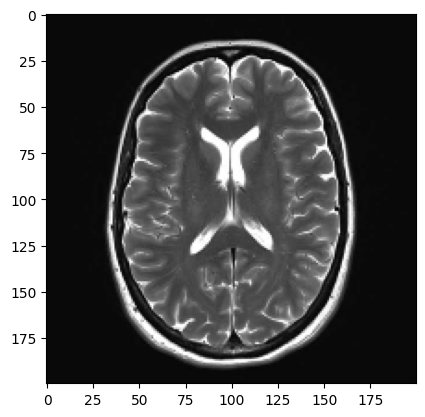

In [8]:
plt.imshow(X[5], cmap='gray')

In [9]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1222, 40000)

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.4)

In [11]:
xtrain.shape, xtest.shape

((733, 40000), (489, 40000))

In [12]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
from xgboost import XGBClassifier
from sklearn.cluster import DBSCAN
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Ridge
warnings.filterwarnings('ignore')

In [14]:
lgr = LogisticRegression(max_iter=1000)
lgr.fit(xtrain, ytrain)

with open('models/lgr.pkl', 'wb') as f:
    pickle.dump(lgr, f)


In [15]:
sv = SVC()
sv.fit(xtrain, ytrain)

with open('models/svc.pkl', 'wb') as f:
    pickle.dump(sv, f)

In [16]:
lr = LinearRegression()
lr.fit(xtrain, ytrain)

with open('models/lr.pkl', 'wb') as f:
    pickle.dump(lr, f)

In [17]:
# pca = PCA()
# pca.fit(xtrain,ytrain)
# pca.
# with open('models/pca.pkl', 'wb') as f:
#     pickle.dump(pca, f)
d

In [18]:
rfc = RandomForestClassifier()
rfc.fit(xtrain, ytrain)

with open('models/rfc.pkl', 'wb') as f:
    pickle.dump(rfc, f)

In [19]:
dtc = DecisionTreeClassifier()
dtc.fit(xtrain, ytrain)

with open('models/dtc.pkl', 'wb') as f:
    pickle.dump(dtc, f)

In [20]:
gbc = GradientBoostingClassifier()
gbc.fit(xtrain, ytrain)

with open('models/gbc.pkl', 'wb') as f:
    pickle.dump(gbc, f)

In [21]:
xgb = XGBClassifier()
xgb.fit(xtrain, ytrain)

with open('models/xgb.pkl', 'wb') as f:
    pickle.dump(xgb, f)

In [22]:
dbscan = DBSCAN()
dbscan.fit(xtrain, ytrain)

with open('models/dbscan.pkl', 'wb') as f:
    pickle.dump(dbscan, f)

In [23]:
lda = LinearDiscriminantAnalysis()
lda.fit(xtrain, ytrain)

with open('models/lda.pkl', 'wb') as f:
    pickle.dump(lda, f)

In [24]:
knc = KNeighborsClassifier()
knc.fit(xtrain, ytrain)

with open('models/knc.pkl', 'wb') as f: 
    pickle.dump(knc, f)

In [25]:
knr = KNeighborsRegressor()
knr.fit(xtrain, ytrain)

with open('models/knr.pkl', 'wb') as f:
    pickle.dump(knr, f)

In [26]:
lso = Lasso()
lso.fit(xtrain, ytrain)

with open('models/lso.pkl', 'wb') as f:
    pickle.dump(lso, f)

In [27]:
mlpc = MLPClassifier()
mlpc.fit(xtrain, ytrain)

with open('models/mlpc.pkl', 'wb') as f:
    pickle.dump(mlpc, f)

In [28]:
rdg = Ridge()
rdg.fit(xtrain, ytrain)

with open('models/rdg.pkl', 'wb') as f:
    pickle.dump(rdg, f)

In [40]:
xgb.score(xtest, ytest)

0.9754601226993865

In [46]:
pred = gbc.predict(xtest)
pred

array([1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,

In [31]:
misclassified=np.where(ytest!=pred)
print(misclassified)
print("Total Misclassified Samples: ",len(misclassified[0]))

(array([  3,  49, 128, 212, 227, 235, 239, 361, 372, 401, 465], dtype=int64),)
Total Misclassified Samples:  11


In [32]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

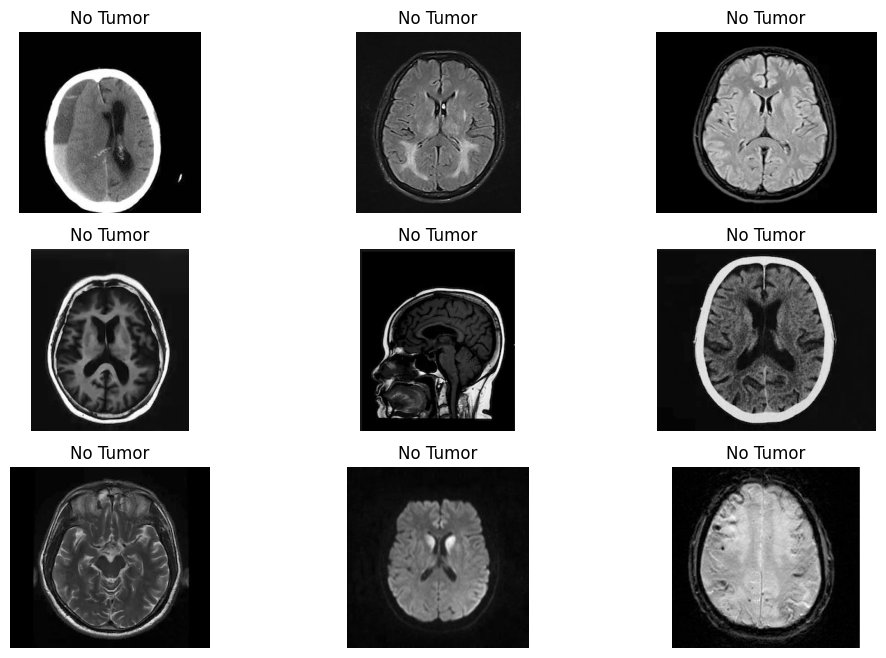

In [33]:
plt.figure(figsize=(12,8))
p = os.listdir('tumor/testing/')
c=1
for i in os.listdir('tumor/testing/no/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('tumor/testing/no/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

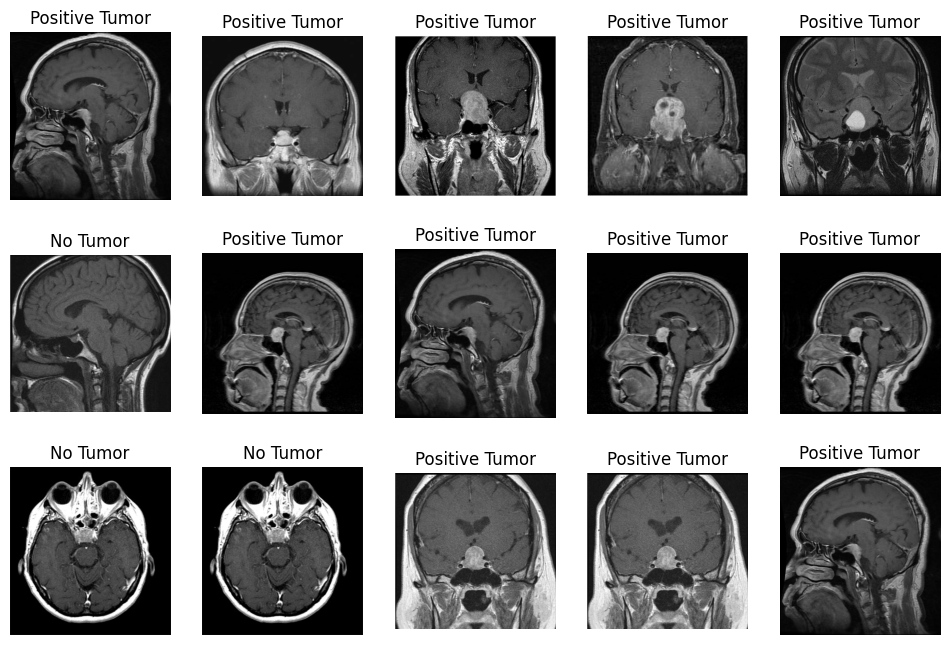

In [34]:
plt.figure(figsize=(12,8))
p = os.listdir('tumor/testing/')
c=1
for i in os.listdir('tumor/testing/yes/')[:15]:
    plt.subplot(3,5,c)
    
    img = cv2.imread('tumor/testing/yes/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = dtc.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1